In [47]:
from langgraph.graph import StateGraph,START,END
from typing import TypedDict,Literal

In [48]:
class QuadState(TypedDict):
    a:float
    b:float
    c:float

    discriminant:float
    equation:str
    result:str

In [65]:
def check_discriminant(state:QuadState)->Literal['equal_root','real_root','complex_root']:
    d=state['discriminant']
    if d>0:
        return 'real_root'
    elif d<0:
        return 'complex_root'
    else:
        return 'equal_root'

In [49]:
def calculate_discriminant(state:QuadState):
    a=state['a']
    b=state['b']
    c=state['c']

    d=(b)**2-4*a*c
    return {'discriminant':d}

In [ ]:
def equal_root(state:QuadState):
    a=state['a']
    b=state['b']
    c=state['c']

    result=(-b)/2*a
    return {'result':f'The roots are equal and they are : {result} and {result}'}

In [ ]:
def real_root(state:QuadState):
    a=state['a']
    b=state['b']
    c=state['c']
    d=state['discriminant']

    result1=(-b+(d)**0.5)/2*a
    result2=(-b-(d)**0.5)/2*a

    return {'result':f'The roots are {result1} and {result2}'}

In [63]:
def complex_root(state:QuadState):
    result=f'The real roots doesnot exists.'
    return {'result':result}

In [53]:
def show_equation(state:QuadState):
    eqn=f"{state['a']}x*2{state['b']}x{state['c']}"
    return {'equation':eqn}

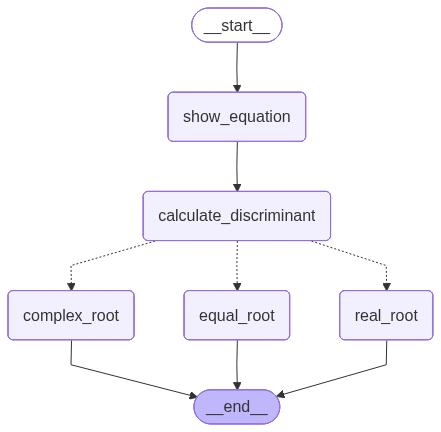

In [66]:
# make the graph
graph=StateGraph(QuadState)

# make the nodes
graph.add_node('calculate_discriminant',calculate_discriminant)
graph.add_node('complex_root',complex_root)
graph.add_node('equal_root',equal_root)
graph.add_node('real_root',real_root)
graph.add_node('show_equation',show_equation)



# make the edges
graph.add_edge(START,'show_equation')
graph.add_edge('show_equation','calculate_discriminant')

graph.add_conditional_edges('calculate_discriminant',check_discriminant)
graph.add_edge('real_root',END)
graph.add_edge('complex_root',END)
graph.add_edge('equal_root',END)

# make the workflow
workflow=graph.compile()
workflow

In [67]:
initial_state={
    'a':4,
    'b':-5,
    'c':-4
}

In [68]:
# Execute the graph
output_state=workflow.invoke(initial_state)
output_state

{'a': 4,
 'b': -5,
 'c': -4,
 'discriminant': 89,
 'equation': '4x*2-5x-4',
 'result': 'The roots are 28.867962264113206 and -8.867962264113206'}